# **Fit Pvsyst temperature model coefficients against measured data**

This example shows how to fit the u_c and u_v coefficients of Pvsyst cell temperature model against measured data.

We will:
1. Import measured cell temperatures from the Measurement DB
2. Create a site and define its design
3. Compare energy yield based on measured and modeled cell temperatures (default and optimal parameters)
4. Visualize results

In [1]:
from pvradar.sdk import PvradarSite, R, resource_plot, make_tracker_design, describe, for_resource, MeasurementGroup

## Get measured cell temperature

In [2]:
measurement_group = MeasurementGroup('pvradar-webinar-2')
measured_cell_temp = measurement_group.measurement(R.cell_temperature, label='measurement')
describe(measured_cell_temp)

cell_temperature: mean hourly cell temperature in degC labeled "measurement"
744 data points (2020-03-01 00:00:00-07:00 to 2020-03-31 23:00:00-07:00)

In [3]:
resource_plot(measured_cell_temp)

## Define location and plant design

In [4]:
location = 35.0545, -106.5390  # SANDIA Labs, Albuquerque, NM, USA
site = PvradarSite(location=location, interval='2020-03-01..2020-03-31')
site.design = make_tracker_design()

## Calculate cell temperatures with default parameters

For more on R-Notation and available attributes, see the [Resource DB](https://pvradar.notion.site/1d157af8487c80d68be3ce9473e9bbba?v=1d157af8487c81759b9f000cecd9245f) and [R-Notation Guide](https://pvradar.notion.site/Resources-R-Notation-1ca57af8487c80d1a9a1ccea2bdba962).

In [5]:
default_cell_temp = site.resource(R.cell_temperature, label='default parameters')
air_temp = site.resource(R.air_temperature(datasource='merra2'), label='air')

resource_plot(air_temp, default_cell_temp, measured_cell_temp)

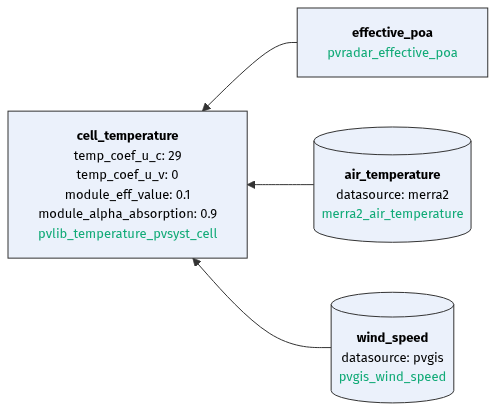

In [6]:
site.profile(R.cell_temperature).display_flowchart(max_depth=1)

## Fitting temperature coefficients to better represent measured data

In [7]:
opt_temp_params = site.optimize(
    R.cell_temperature,
    target=measured_cell_temp,
    parameters=['temp_coef_u_c', 'temp_coef_u_v']
)

# print results
for key, val in opt_temp_params.items():
    print(key, val)

temp_coef_u_c 28.15647126631258
temp_coef_u_v 1.5698780265537264


In [8]:
opt_cell_temperature = site.resource(R.cell_temperature, **opt_temp_params, label='optimized')

In [9]:
resource_plot(air_temp, measured_cell_temp, opt_cell_temperature)

## Estimate energy yield with different temperature inputs

In [10]:
# yield with modeled cell temperature (default model parameters)
yield_default = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='default')

# yield with modeled cell temperature (optimal model parameters)
yield_optimized = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), **opt_temp_params, label='optimal')

# yield with measured cell temperature
with site.hooks(for_resource(R.cell_temperature).use(measured_cell_temp)):
    yield_measured = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='measured')

total_measured = yield_measured.sum()
total_default = yield_default.sum()
total_optimized = yield_optimized.sum()

print("Energy yield (MWh):")
print(f"Measured: {total_measured:.2f}")
print(f"Default : {total_default:.2f}")
print(f"Optimized: {total_optimized:.2f}")

print("Relative differences:")
print(f"Default vs Measured: {(total_default - total_measured) / total_measured * 100:.3f}%")
print(f"Optimized vs Measured: {(total_optimized - total_measured) / total_measured * 100:.3f}%")


Energy yield (MWh):
Measured: 19948.95
Default : 19874.30
Optimized: 19949.32
Relative differences:
Default vs Measured: -0.374%
Optimized vs Measured: 0.002%


# **Why PVRADAR?**

## Model and optimize the real-world behavior of your PV plants

PVRADAR allows you to model the effect of **any technical or environmental factor** on plant performance — not just temperature:
- Combine temperature, soiling, snow, albedo, clipping, and more in a single modeling workflow.
- Quantify impacts in terms of energy yield, PR, LCOE, and financial KPIs.
- Explore what-if scenarios and optimize plant design and O&M strategies.

## Build internal tools and advanced applications

With PVRADAR, you can turn your models into robust, organization-wide tools:
- Build internal web apps that allow colleagues to apply validated models without writing code.
- Standardize modeling across teams and projects.
- Automate reporting and performance analysis to save time and ensure consistency.

## One Python line away from your data

The PVRADAR SDK simplifies data access:
- Seamlessly connect to satellite data, meteo stations, and internal performance databases.
- Standardize and pre-process data for modeling — ready to use in one line of Python.
- Keep full control over your data, whether in the cloud or on-premises.

## Supported by deep expertise

PVRADAR is more than software — it is backed by industry-leading expertise:
- Model validation and tuning with high-quality reference data.
- Consulting and support on temperature losses, O&M optimization, and yield forecasting.
- Proven track record with leading IPPs, developers, and consultants.

👉 **Ready to go further?** [**Contact us to learn how we can help solve your modeling challenge!**](https://pvradar.com/contact)
